## Sentiment Analysis of _Amazon Fine Food Reviews_

https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews?select=Reviews.csv


#### step 1 
import necessary libraries

In [2]:
import pandas as pd #dataframe library
import numpy as np #linear algebra
import matplotlib.pyplot as plt #visualisation
import seaborn as sns #visualisation
plt.style.use('ggplot')
import nltk #natural language toolkit
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /home/katarzyna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/katarzyna/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/katarzyna/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/katarzyna/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

read and display the data

In [3]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### step 2
EDA & NLTK

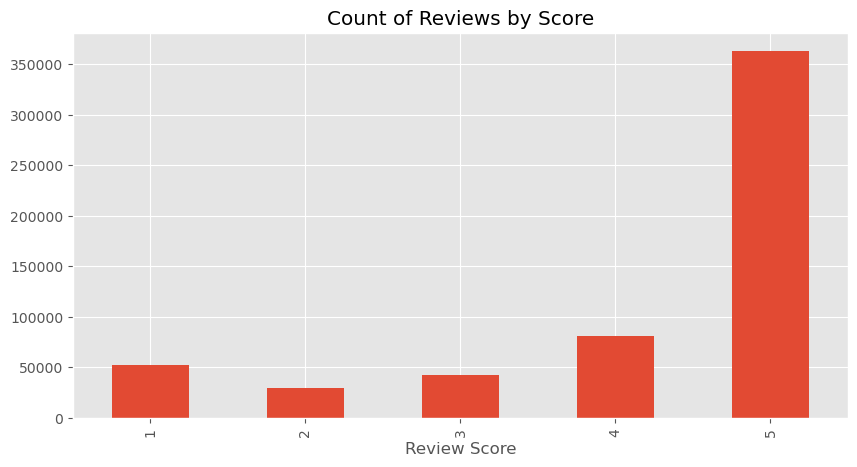

In [4]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Score', figsize=(10,5))
ax.set_xlabel('Review Score')
plt.show()

In [8]:
review_example = df['Text'][1000]
print(review_example)

I never in my life tasted such a good babka its crazy good! This is the real babka! That my gram mother use to make


In [12]:
tokens = nltk.word_tokenize(review_example)
tokens[:10]

['I', 'never', 'in', 'my', 'life', 'tasted', 'such', 'a', 'good', 'babka']

In [11]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('never', 'RB'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('life', 'NN'),
 ('tasted', 'VBD'),
 ('such', 'PDT'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('babka', 'NN')]

In [13]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  never/RB
  in/IN
  my/PRP$
  life/NN
  tasted/VBD
  such/PDT
  a/DT
  good/JJ
  babka/NN
  its/PRP$
  crazy/JJ
  good/JJ
  !/.
  This/DT
  is/VBZ
  the/DT
  real/JJ
  babka/NN
  !/.
  That/IN
  my/PRP$
  gram/NN
  mother/NN
  use/NN
  to/TO
  make/VB)


#### step 3
Model

#### classification 

In [16]:
df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


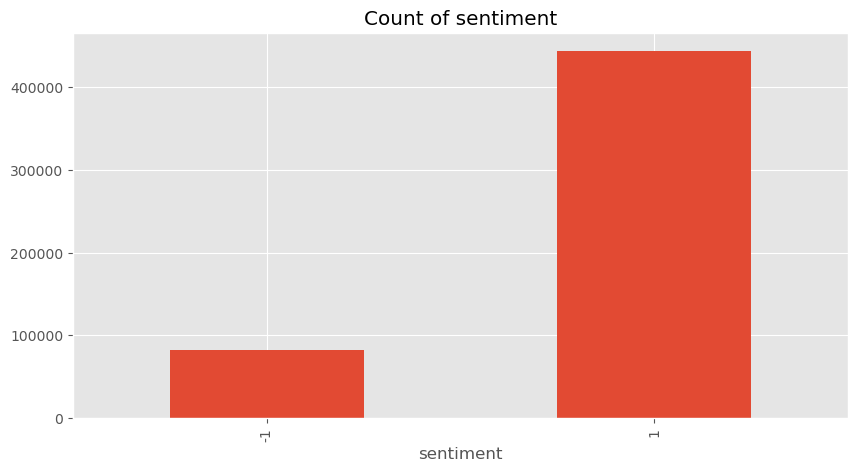

In [17]:
ax = df['sentiment'].value_counts().sort_index().plot(kind='bar', title='Count of sentiment', figsize=(10,5))
ax.set_xlabel('sentiment')
plt.show()

#### dataframe for the model & data cleaning 

In [24]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

In [25]:
df_model = df[["Summary", "sentiment"]]
df_model

,Summary,sentiment
0,Good Quality Dog Food,1
1,Not as Advertised,-1
2,Delight says it all,1
3,Cough Medicine,-1
4,Great taffy,1
...,...,...
568449,Will not do without,1
568450,disappointed,-1
568451,Perfect for our maltipoo,1
568452,Favorite Training and reward treat,1


#### split data into train and test sets

In [35]:
from sklearn.model_selection import train_test_split
X = df_model['Summary']
y = df_model['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
# vectorizer for splitted sets:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#### logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)
prediction = lr.predict(X_test)


/home/katarzyna/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### testing & results

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(prediction,y_test)

array([[10850,  2216],
       [ 5383, 86709]])

In [42]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

          -1       0.67      0.83      0.74     13066
           1       0.98      0.94      0.96     92092

    accuracy                           0.93    105158
   macro avg       0.82      0.89      0.85    105158
weighted avg       0.94      0.93      0.93    105158

